<a href="https://colab.research.google.com/github/AbhishekDutt/kaggle-fake-news/blob/master/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Training Data

In [2]:
%%bash
if [ ! -f data/fake-news.zip ]; then
  wget https://github.com/AbhishekDutt/kaggle-fake-news/raw/master/data/fake-news.zip -P data/
fi
if [ ! -f data/train.csv ]; then
  unzip data/fake-news.zip -d data/
fi

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Check for Null Data

Total row count: 20,800
NULL row count: 2,515
NULL row %: 12.09%
Atleast 'text' is present for all rows with null values in 'title' and 'author'


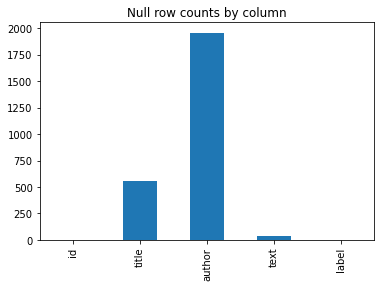

In [112]:
null_columns=train.columns[train.isnull().any()]
print("Total row count: {:,}".format(len(train)))
print("NULL row count: {:,}".format(len(train[train.isnull().any(axis=1)])))
print("NULL row %: {:.2%}".format(len(train[train.isnull().any(axis=1)])/len(train)) )
# train[train.isnull().any(axis=1)]
# train[train["title"].isnull()]
train.isnull().sum().plot(kind="bar", title="Null row counts by column");
print("Atleast \'text\' is present for all rows with null values in \'title\' and \'author\'")

Classes are balanced:


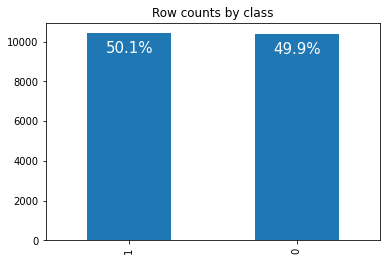

In [142]:
ax = train["label"].value_counts().plot(kind="bar", title="Row counts by class");
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.1%}'.format(height/len(train)), (p.get_x()+0.5*width, p.get_y()+height-1000), ha='center', fontsize=15,
color='white')
print("Classes are balanced:")

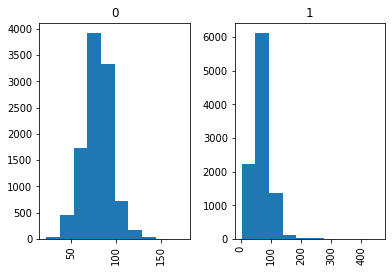

In [144]:
train['title'].str.len().hist(by=train['label']);

In [28]:
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Word Embedding: